In [790]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import math
import itertools
plt.style.use('seaborn')
path = './healthcare-dataset-stroke-data.csv'



The notebook is divided into the following sections:

- Exploratory data Analysis
- Hypothesis tesing (frequentist way)- : Comparing clinical features  :
    * stroke vs no stroke, 
    * heart disease vs no heart disease,
    * hypertension vs no hypertension.
- Correlation Analysis:
    *  Conntinuous values correlation.(e.g. bmi and age)
    * Categorical and continuous value correlation.(e.g Stroke and age)
    * Categorical vs Categeorical correlation.(e.g. Stroke and heart disease)
- Hypothesis Testing (Frequentist way): Rate of Stroke between heart disease and no heart disease.
- Bayesian Inference (Finding Posteriors of Rate of Stroke for heart disease vs no heart disease).
- Bayesian Hypothesis Testing : Rate of Stroke if you have heart disease vs not.
- Bayesian Hypothesis Testing : Rate of Stroke for Males vs Females.
- Finding Top Risk factors of Stroke through Bayesian Inference


## 1. Exploratory Data Analysis

### a) Read CSV Data

In [726]:
## Read data function
def read_data(path):
    df_a = pd.read_csv(path)
    df_a = df_a.dropna(axis = 0)
    df_a = df_a[df_a['gender']!='Other']
    ## convert str type columns to int columns
    df_a[['stroke','heart_disease','hypertension']].astype(str).astype(int)
    return df_a

In [727]:
df = read_data(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [728]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### b) Create catgorical(binary) string values for binary value columns

In [729]:
## create categorical names in columns with binary values for plotting.
def create_columns(df_a, features):
    for column in features:
        newcol = column + '_cat'
        df_a[newcol]=df_a[column].apply(lambda x: column if x == 1 else f'no {column}')
        df_a.reset_index()
    ## create categorical names in columns with binary values for plotting.
    return df_a

In [730]:
features  = ['hypertension','heart_disease','stroke']
df = create_columns(df,features)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hypertension_cat,heart_disease_cat,stroke_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,no hypertension,heart_disease,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,no hypertension,heart_disease,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,no hypertension,no heart_disease,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,hypertension,no heart_disease,stroke
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,no hypertension,no heart_disease,stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,no hypertension,no heart_disease,no stroke
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,no hypertension,no heart_disease,no stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,no hypertension,no heart_disease,no stroke
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,no hypertension,no heart_disease,no stroke


#### Checking the data types

In [731]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
hypertension_cat      object
heart_disease_cat     object
stroke_cat            object
dtype: object

In [732]:
def plot_categorical(df_a,features,feat_type ='categorical'):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots, 1,figsize = (n_plots * 3, n_plots * 4))
    for i,ax in enumerate(axs.flatten()):
        newdf = df_a[features[i]]
        ## getting the names from value counts
        names = df_a[features[i]].value_counts().index.tolist()
        ax.pie(newdf.value_counts(),labels = np.array(names),labeldistance=1.1, autopct='%1.1f%%',textprops={'fontsize': 20})
        ax.set_title(f'Distribution of {features[i]}', size = 20)
        sns.set_style("white")
        ## commented code is for donut plot
        #my_circle=plt.Circle( (0,0), 0.7, color='white')
        #p=plt.gcf()
        #p.gca().add_artist(my_circle)
    fig.tight_layout() ## increases spacing between multiple plots
    plt.savefig(f'images/{feat_type}_piecharts.png',dpi = 350)

### c) Plotting pie charts for categorical columns

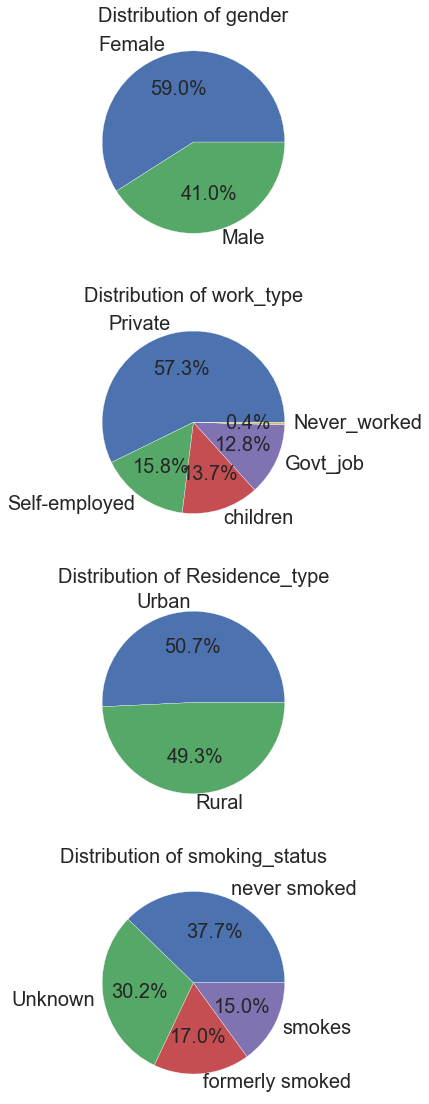

In [733]:
features= ['gender','work_type','Residence_type','smoking_status']
plot_categorical(df,features)

In [795]:
def plot_numerical(df_a,num_features):
    n_plots = len(num_features)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 5))
    sns.set(font_scale = 2.4)
    for i,val in enumerate(axs.flatten()):
        newdf = df_a[features[i]]
        sns.set_style("white")
        sns.histplot(newdf,ax = axs[i],kde = True, alpha = 0.4, color="teal")
        axs[i].axvline(newdf.median(), color='r', linestyle='--', label="Mean")
    fig.tight_layout()
    plt.savefig('images/continuous_distributions.png',dpi = 350)

### d) Plotting distributions for continuous value columns

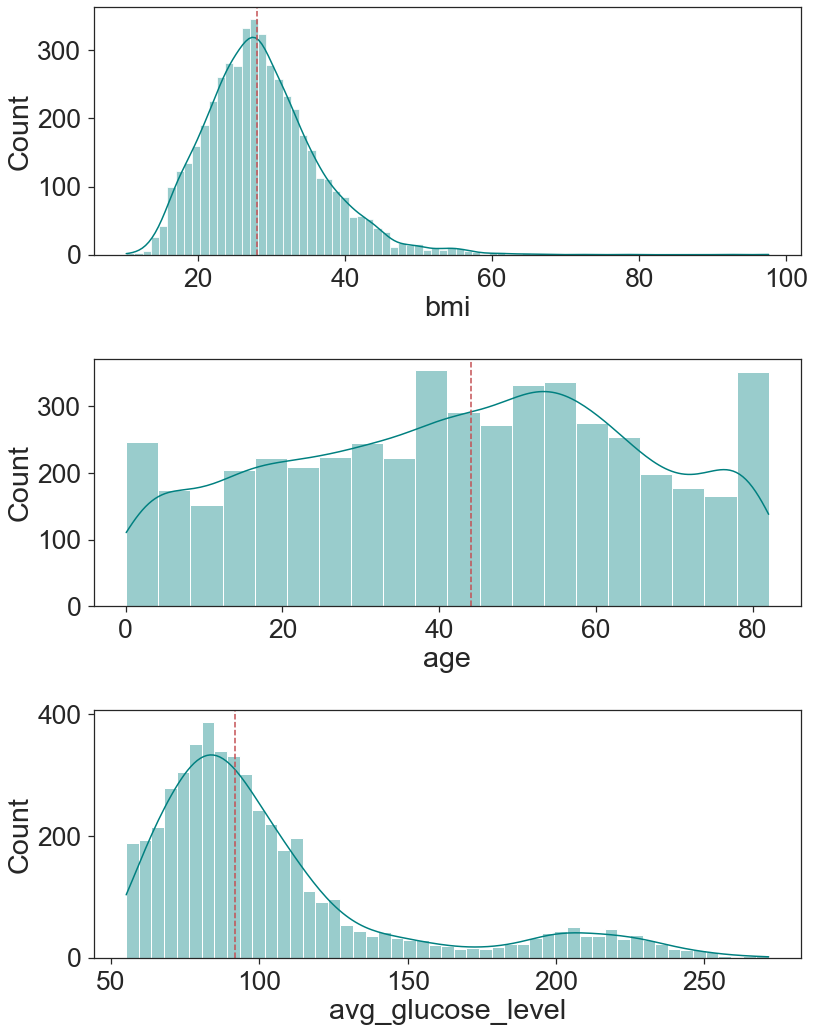

In [796]:
features = ['bmi','age','avg_glucose_level']
plot_numerical(df,features)

### e) Plotting pie charts for binary value columns

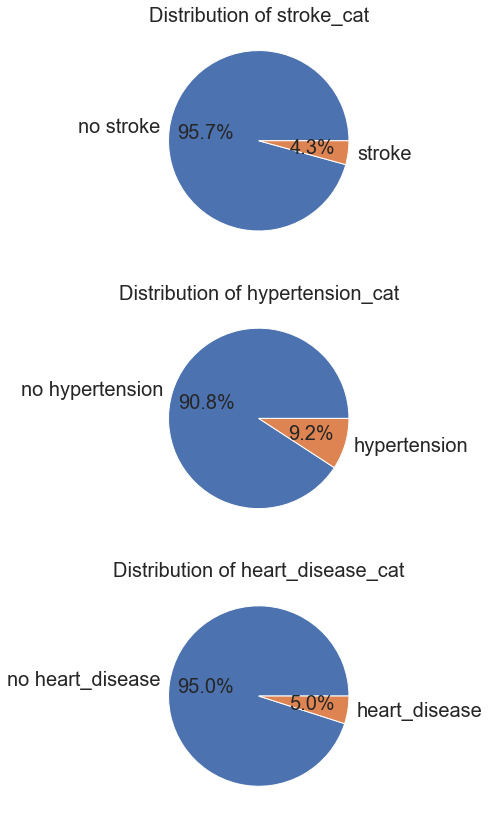

In [736]:
features = ['stroke_cat','hypertension_cat','heart_disease_cat']
plot_categorical(df,features,feat_type ='binary')

## 2. Hypothesis testing (brief analysis)

### a) Is having higher BMI associated with stroke?

The plots for this are done below with other clinical variables

In [737]:
df_nonstroke = df[df['stroke']==0]
df_stroke = df[df['stroke']==1]

In [738]:
stats.ttest_ind(df_stroke['bmi'],df_nonstroke['bmi'])

Ttest_indResult(statistic=2.968365485973203, pvalue=0.003008355955526417)

### b) Is having higher average glucose levels associated with stroke?

In [739]:
stats.ttest_ind(df_stroke['avg_glucose_level'],df_nonstroke['avg_glucose_level'])

Ttest_indResult(statistic=9.830215360205345, pvalue=1.3476353968167712e-22)

The difference in stroke and non stroke samples for both BMI and average glucose levels seem to be statistically significant

#!pip install statannot


<!-- we are doing sampling distribution tests, use CLT to show differences in BMI, do bootstrapping.
to get the visuals.

add violin plots and show dist plots on side -->

## 3. Hypothesis testing (detailed analysis with plots)

### a) Is BMI, Age and Average Glucose Level associated with stroke?

In [740]:
features = ['bmi','age','avg_glucose_level']


In [741]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [742]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
hypertension_cat      object
heart_disease_cat     object
stroke_cat            object
dtype: object

In [793]:
def plot_boxplots(df_a,num_features,categorical):
    from statannot import add_stat_annotation
    n_plots = len(num_features)
    df_a[categorical]= df_a[categorical].astype(str)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 6))
    # set palette 
    palettes = ['husl','Set2','colorblind','muted']
    #palette = itertools.cycle(sns.color_palette())
    for i,val in enumerate(axs.flatten()):
    ## convert to category
        sns.set_context("talk")
        sns.set(font_scale = 2.4)
        sns.set_style("ticks")
        sns.violinplot(x =  categorical, y = num_features[i],data = df_a,ax = axs[i],palette = palettes[i])
        axs[i].set_xticklabels(labels = [categorical, f'No {categorical}'])
        axs[i].set_xlabel(f"Comparing {num_features[i]}:{categorical} vs No {categorical}")
        axs[i].xaxis.set_label_position('top') 
        # Then with the str order
        #order = [str(window_id) for window_id in order]
        add_stat_annotation(
            ax = axs[i],
            data=df_a,
            x= categorical,
            y=num_features[i],
            #order = order,
           box_pairs=[
                (('0', '1')),
            ],
            test="t-test_ind",
            text_format="star",
            loc='inside'
        )
    fig.tight_layout()
    plt.savefig(f'images/{categorical}_boxplots.png',dpi = 350)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=3.008e-03 stat=2.968e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=3.841e-61 stat=1.673e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.348e-22 stat=9.830e+00


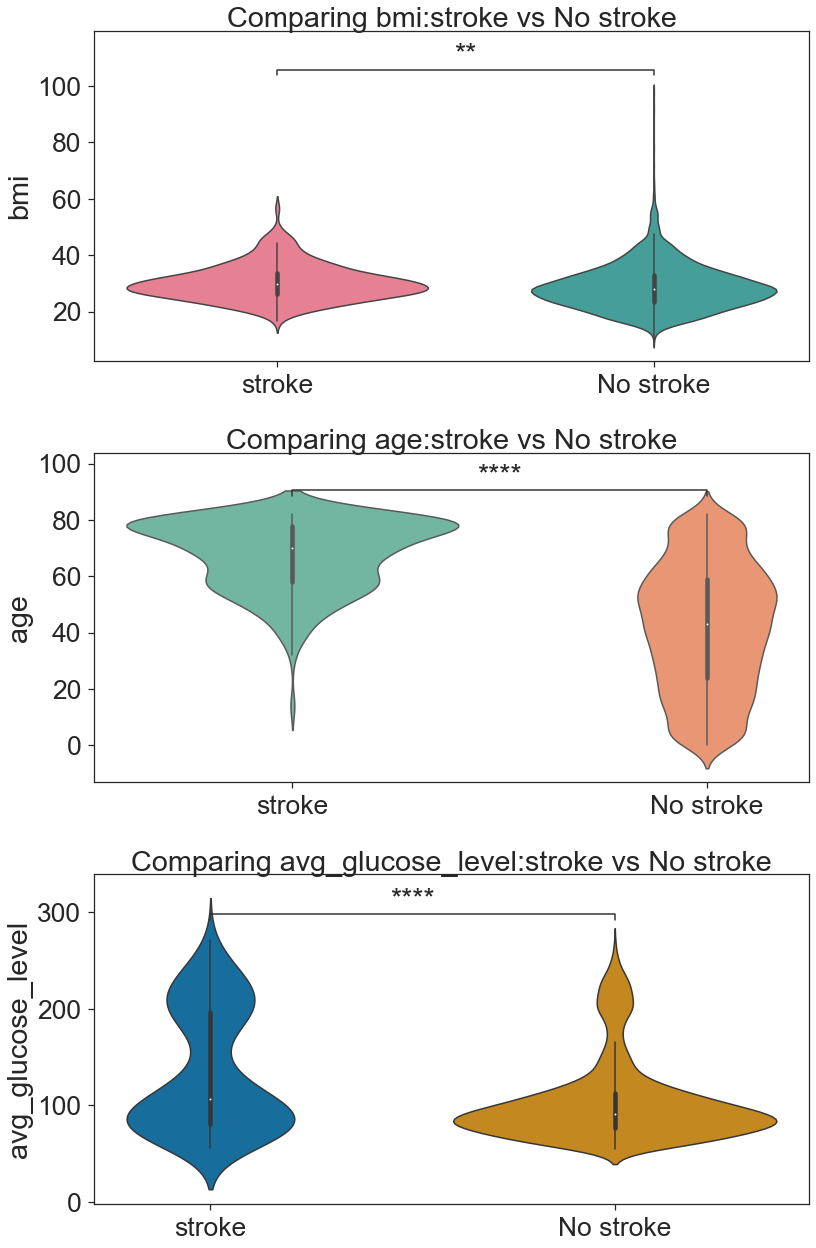

In [794]:
plot_boxplots(df,features,categorical = 'stroke')

In [797]:
### Using Central Limit Theorem
def plot_dist(df_a, features,categorical):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots,1 , figsize = (n_plots * 4, n_plots * 5))
    palettes = ['husl','Set2','colorblind','muted']
    for i,val in enumerate(axs.flatten()):
        df_a[categorical]= df_a[categorical].astype(int)
        df_pos = df_a[df_a[categorical]==1][features[i]]
        df_neg = df_a[df_a[categorical]==0][features[i]]
        
        df_pos_mean, df_pos_std  = df_pos.mean(),np.std(df_pos)
        df_neg_mean, df_neg_std  = df_neg.mean(),np.std(df_neg)
        dist_pos = stats.norm(df_pos_mean, df_pos_std)
        dist_neg = stats.norm(df_neg_mean, df_neg_std)
        x = np.linspace(min(df_neg) - 40,max(df_pos) + 15,10000)
        ## extracting color names from eaach color pallette
        pal = sns.color_palette(palettes[i])
        ## plot positive 
        axs[i].plot(x, dist_pos.pdf(x), linewidth = 3,label = categorical, color = pal[0])
        ## plot negative
        axs[i].plot(x, dist_neg.pdf(x), linewidth = 3,color = pal[1],label=f'No {categorical}')
        axs[i].set_xlabel(f"Comparing {features[i]}:{categorical} vs No {categorical}")
        axs[i].xaxis.set_label_position('top') 
        axs[i].legend( frameon=False)
    fig.tight_layout()
    plt.savefig(f'images/{categorical}_lineplots.png',dpi = 350)

In [798]:
features = ['bmi','age','avg_glucose_level']


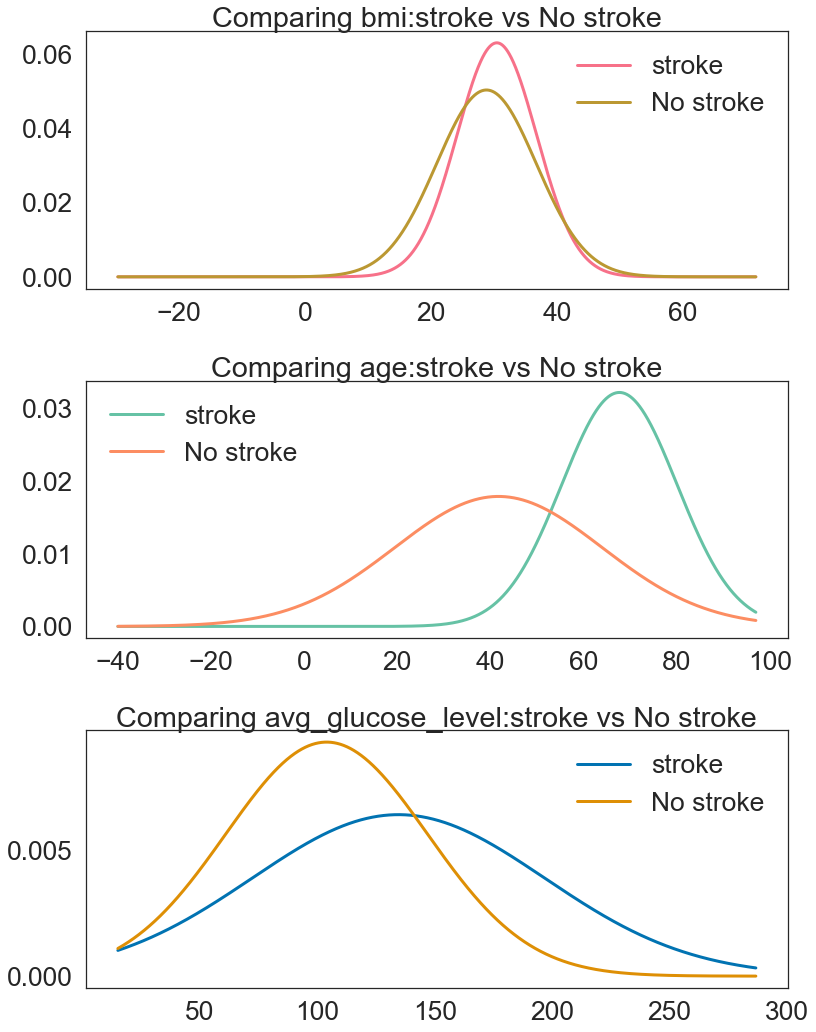

In [799]:
plot_dist(df, features,categorical = 'stroke')

### b) Is BMI, Age and Average Glucose Level associated with heart disease?

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=3.787e-03 stat=2.897e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=6.155e-75 stat=1.863e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.258e-27 stat=1.096e+01


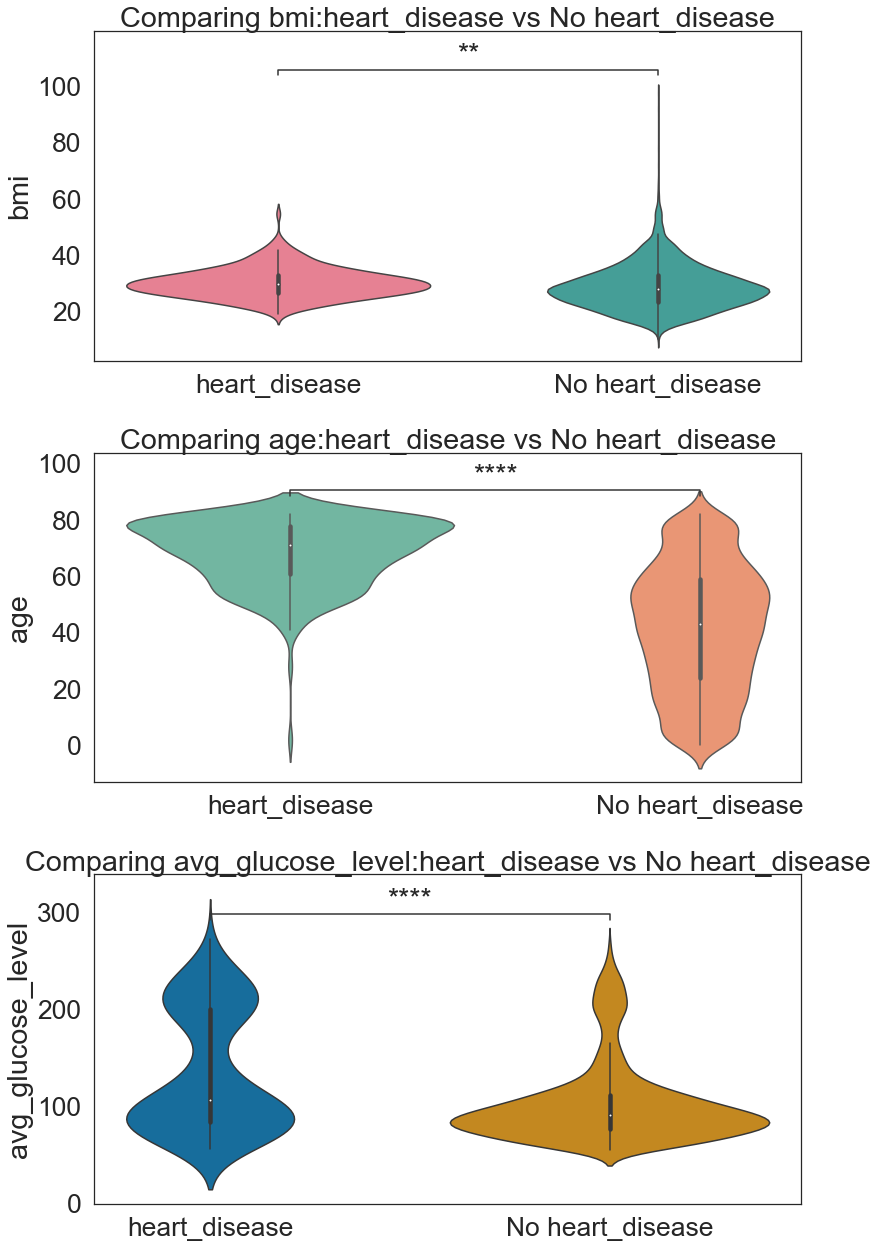

In [800]:
plot_boxplots(df,features,categorical = 'heart_disease')

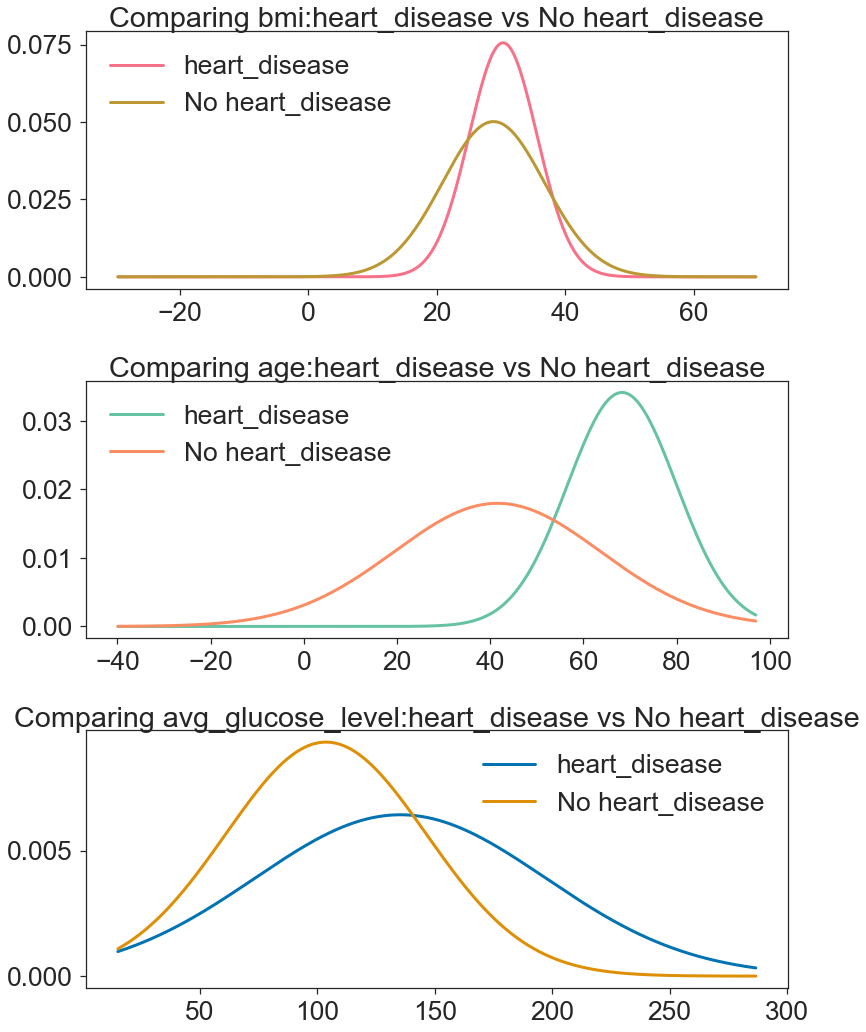

In [801]:
plot_dist(df, features,categorical ='heart_disease')

### c) Is BMI, Age and Average Glucose Level associated with hypertension?

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test independent samples with Bonferroni correction, P_val=2.589e-32 stat=-1.192e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test independent samples with Bonferroni correction, P_val=1.682e-85 stat=-1.999e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test independent samples with Bonferroni correction, P_val=2.921e-37 stat=-1.286e+01


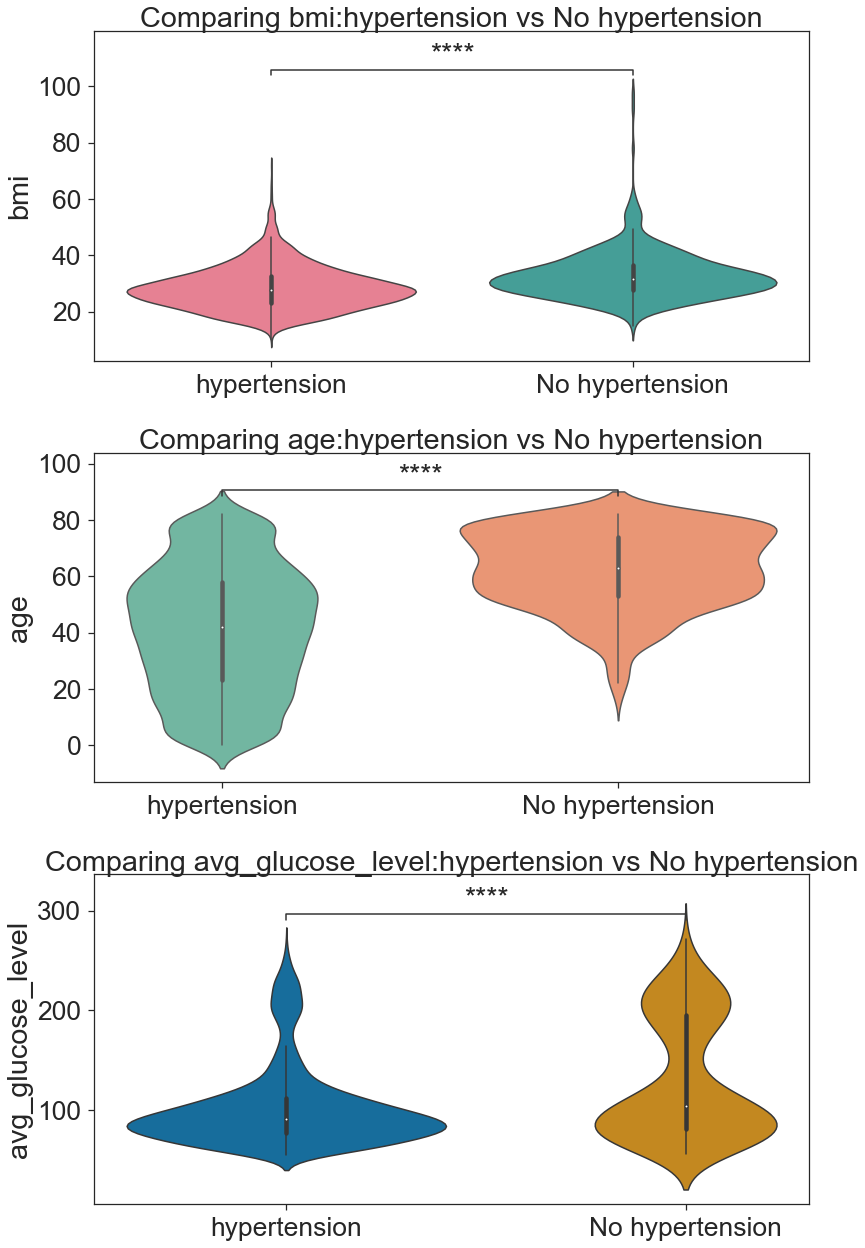

In [802]:
plot_boxplots(df,features,categorical = 'hypertension')

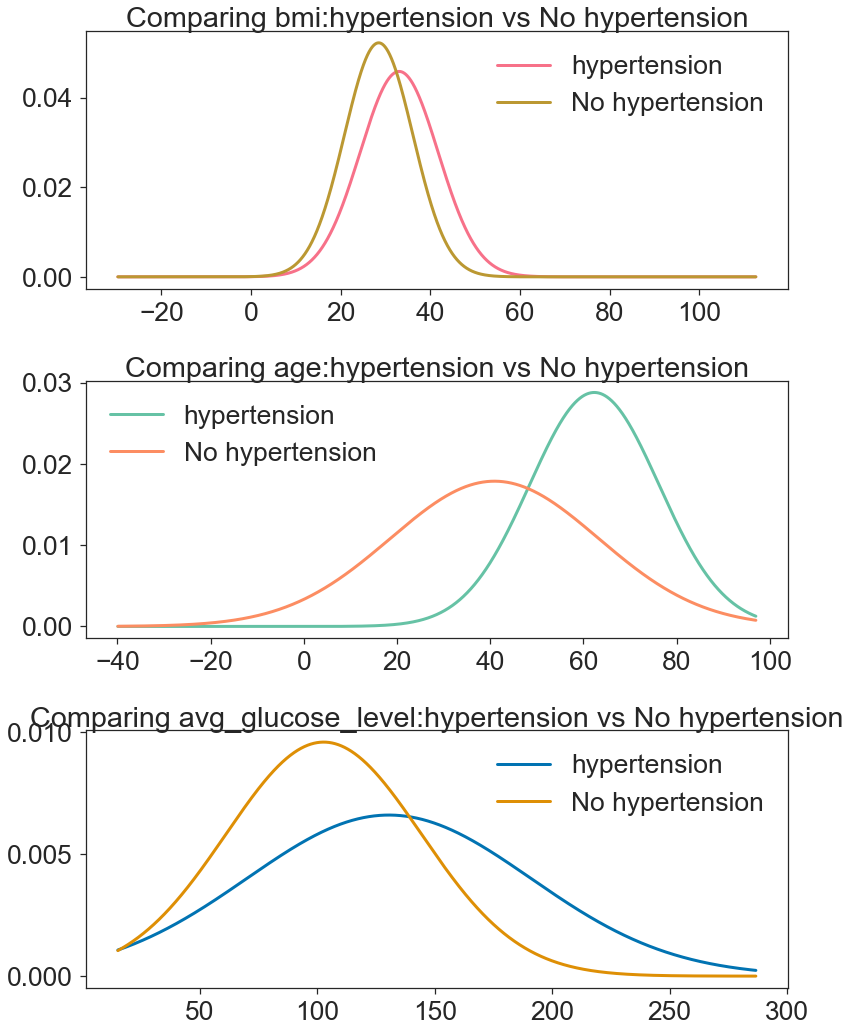

In [803]:
plot_dist(df, features,categorical ='hypertension')

## 4. Correlation Analysis

### a) Are Age,BMI and avg glucose levels correlated?

In [752]:
features = ['bmi','age','avg_glucose_level']
## correlation function
def df_corr(df_a,features):
    newdf = df_a[features].corr(method ='spearman')
    return newdf

In [753]:
df2 = df_corr(df,features)
df2

,bmi,age,avg_glucose_level
bmi,1.000000,0.375441,0.114633
age,0.375441,1.000000,0.141009
avg_glucose_level,0.114633,0.141009,1.000000


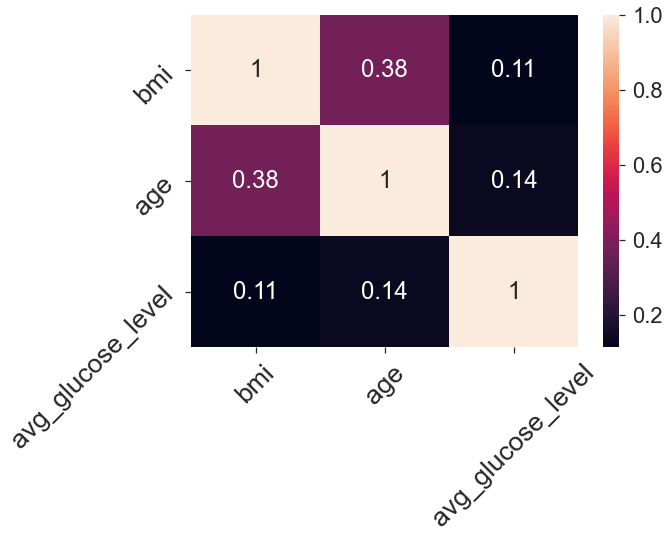

In [754]:
fig,ax = plt.subplots(1, 1, figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(df2,annot=True)
ax.tick_params(labelrotation = 45)
fig.tight_layout()

In [755]:
stats.spearmanr(df['avg_glucose_level'],df['bmi'])[1]

7.921607202834136e-16

In [756]:
stats.spearmanr(df['age'],df['bmi'])[1]

4.18194663724133e-164

In [757]:
## getting p values from correlation
def get_pvals(df_a,features):
    pvals = np.zeros((3,3))
    for i,val in enumerate(features):
        for j,val2 in enumerate(features):
        ## store p value present in index 1
            pvals[i][j]= stats.spearmanr(df_a[val],df_a[val2])[1]
    pvals = pd.DataFrame(pvals)
    pvals.columns = features
    pvals.index = features
    return pvals
    

In [758]:
df_pval = get_pvals(df,features)
df_pval

,bmi,age,avg_glucose_level
bmi,0.000000e+00,4.181947e-164,7.921607e-16
age,4.181947e-164,0.000000e+00,3.214823e-23
avg_glucose_level,7.921607e-16,3.214823e-23,0.000000e+00


### Plotting correlation p-values in heatmap

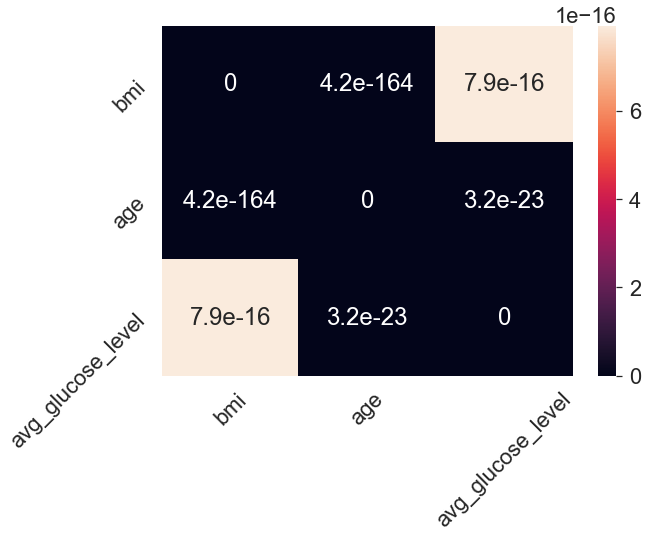

In [759]:
fig,ax = plt.subplots(1, 1, figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(df_pval,annot=True)
ax.tick_params(labelrotation = 45)
fig.tight_layout()

### b) Comparing categorical and continuous variables

### What is Point-Biserial Correlation?

### categorical vs continuous correlation

    - Like all correlation analyses the Point-Biserial Correlation measures the strength of association or co-occurrence between two variables. (categorical vs continuous)
    - e.g.  indicates a positive relationship between the math score and passing the final exam or failing it. 

Stroke and age are correlated

In [760]:
#df['age'] = df['age'].asdtype(int)
stats.pointbiserialr(df['stroke'].astype(int), df['age'])

PointbiserialrResult(correlation=0.23231301313066932, pvalue=3.840890384526994e-61)

Heart disease and age are also correlated

In [761]:
stats.pointbiserialr(df['heart_disease'].astype(int), df['age'])

PointbiserialrResult(correlation=0.2571040168665478, pvalue=6.154616812206063e-75)

### c) Chi squared test
#### Testing association between categorical variables

#### Does having heart disease associate with stroke?

### Heart disease and stroke

In [762]:
# Contingency table.
contingency = pd.crosstab(df['stroke'], df['heart_disease'])
contingency

heart_disease,0,1
stroke,,
0,4496,203
1,169,40


In [763]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

(90.24989255123297,
 2.0990170036138994e-21,
 1,
 array([[4466.34779951,  232.65220049],
        [ 198.65220049,   10.34779951]]))

Since the p-value is significant, there is association between heart disease and stroke

#### Does having hypertension associate with heart disease?

### Hyper tension and heart disease

In [764]:
# Contingency table.
contingency = pd.crosstab(df['hypertension'], df['heart_disease'])
contingency

heart_disease,0,1
hypertension,,
0,4272,185
1,393,58


In [765]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

(64.17924228860268,
 1.1359933598925174e-15,
 1,
 array([[4236.3294621,  220.6705379],
        [ 428.6705379,   22.3294621]]))

Since the p-value is significant, there is association between hypertension and heart disease

#### Does having hypertension associate with stroke?

### Hypertension and stroke

In [766]:
# Contingency table.
contingency = pd.crosstab(df['hypertension'], df['stroke'])
contingency

stroke,0,1
hypertension,,
0,4308,149
1,391,60


In [767]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

(97.23918231192063,
 6.143875464115642e-23,
 1,
 array([[4267.20517522,  189.79482478],
        [ 431.79482478,   19.20517522]]))

Since the p-value is significant, there is association between hypertension and stroke

In [768]:
observed_vals = contingency.reset_index(drop=True)
observed_vals = observed_vals.rename_axis(None, axis=1)
observed_vals.set_index([["hypertension_0", "hypertension_1"]], inplace=True)
observed_vals = observed_vals.reset_index()
observed_vals.rename(columns={"index": "hypertension",0: "stroke_0", 1:"stroke_1"}, inplace=True)
observed_vals

,hypertension,stroke_0,stroke_1
0,hypertension_0,4308,149
1,hypertension_1,391,60


In [769]:
expected_vals = pd.DataFrame(expected)
expected_vals.set_index([["hypertension_0", "hypertension_1"]], inplace=True)
expected_vals = expected_vals.reset_index()
expected_vals.rename(columns={"index": "hypertension", 0: "stroke_0", 1:"stroke_1"}, inplace=True)
expected_vals

,hypertension,stroke_0,stroke_1
0,hypertension_0,4267.205175,189.794825
1,hypertension_1,431.794825,19.205175


In [770]:
# Creating a column-wise sum table, adding back the column with hypertension names
col_sum = pd.DataFrame(observed_vals.sum(axis=1), columns=["count"])
col_sum.insert(0, "hypertension", ["hypertension_0", "hypertension_1"], True)
# Creating a row-wise sum table
row_sum = pd.DataFrame(observed_vals.iloc[:,1:].sum(axis=0), columns=["count"])
#row_sum.rename(columns={"index":"stroke"}, inplace=True)
row_sum.insert(0, "stroke", ["stroke_0", "stroke_1"], True)


<ipython-input-770-fcab926bbf43>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_sum = pd.DataFrame(observed_vals.sum(axis=1), columns=["count"])


In [771]:
# Find all the unique hypertension for pairwise comparison
hypertensions = ['hypertension_0','hypertension_1']
# Find all the unique stroke for pairwise comparison
strokes = ['stroke_0','stroke_1']
# Iterate through all combinations of parties and status
for p in hypertensions:
    for s in strokes:
        observed = float(observed_vals.loc[observed_vals.hypertension == p][s].values[0])
        expected = float(expected_vals.loc[expected_vals.hypertension == p][s].values[0])
        col_total = float(col_sum[col_sum["hypertension"] == p]["count"].values[0])
        row_total = float(row_sum[row_sum["stroke"] == s]["count"].values[0])
        print("observed:" ,observed,"expected:",expected, "coltotal:",col_total,"rowtotal:",row_total)
        expected_row_prop = expected/row_total
        expected_col_prop = expected/col_total
        print("exp",expected_row_prop,expected_col_prop)
        std_resid = (observed - expected) / (math.sqrt(expected * (1-expected_row_prop) * (1-expected_col_prop)))
        print("std_resid",std_resid)
        p_val = stats.norm.sf(abs(std_resid))
        if p_val < 0.05/4:
            print(p, s, std_resid, p_val)

observed: 4308.0 expected: 4267.205175224124 coltotal: 4457.0 rowtotal: 4699.0
exp 0.9081092094539528 0.9574164629176855
std_resid 9.983353506981498
hypertension_0 stroke_0 9.983353506981498 9.013447934553133e-24
observed: 149.0 expected: 189.79482477587612 coltotal: 4457.0 rowtotal: 209.0
exp 0.9081092094539528 0.04258353708231459
std_resid -9.98335350698155
hypertension_0 stroke_1 -9.98335350698155 9.013447934548478e-24
observed: 391.0 expected: 431.7948247758761 coltotal: 451.0 rowtotal: 4699.0
exp 0.09189079054604728 0.9574164629176855
std_resid -9.983353506981551
hypertension_1 stroke_0 -9.983353506981551 9.013447934548348e-24
observed: 60.0 expected: 19.20517522412388 coltotal: 451.0 rowtotal: 209.0
exp 0.09189079054604728 0.04258353708231459
std_resid 9.983353506981548
hypertension_1 stroke_1 9.983353506981548 9.013447934548669e-24


Turns out all aare significant

## 5. Hypothesis testing: Central Limit theorem - Heartdisease vs No heart disease : Stroke(predictor)

#### a) We are using Central limit theorem to approximate binomial as a normal distribution, but when we do bayes later on we will stick with binomial as we want to do conjugate priors.

We can fit a normal distribution and check the p-value


In [772]:
df_heartdisease = df[df['heart_disease']==1]
df_noheartdisease = df[df['heart_disease']==0]

In [773]:
## Null hypothesis  : Mean of having stroke if you dont have heart disease is same(= 0.133)
## Alternate hypothesis  : Mean of having stroke if you dont have heart disease is more than .033.

sd = np.sqrt(.133* (1 - 0.133))/np.sqrt(len(df_heartdisease))
alpha = 0.05 ## rejection threshold                                   
null = stats.norm(0.133,sd)
                                    

In [774]:
null.cdf(.03342)

2.423518646627321e-06

#### b) Another frequentist way : t-test (welch's)

In [775]:
stats.ttest_ind(df_heartdisease['stroke'],df_noheartdisease['stroke'],equal_var = False)

Ttest_indResult(statistic=5.350537952372614, pvalue=1.991473579625291e-07)

## 6. Bayesian Inference

Beta Binomial: The difference between the binomial and the beta is that the former models the number of successes (x), while the latter models the probability (p) of success.
In other words, the probability is a parameter in binomial; In the Beta, the probability is a random variable.


In our data, 
Rate of stroke follows beta prior.

In this we already have stroke/not stroke populations so we assume is distributed as bernoulli.
and then we find the number of counts of stroke, which can be distributed as beta distribution.

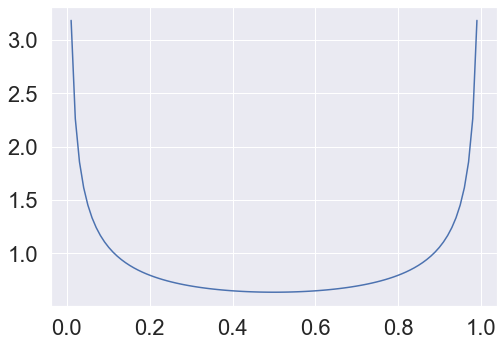

In [776]:
## Jeffrey's prior shown
support = np.linspace(0,1,100)
prior = stats.beta(1/2,1/2)
pdf = prior.pdf(support)
plt.plot(support,pdf)

### We will use Jeffrey's prior which will mean you have an equal chance of having stroke if you have heart disease vs not

####  a) Posterior for heart disease if you have stroke

In [777]:
from matplotlib import animation,rc
from IPython.display import HTML
            

a = 1/2
b = 1/2

## creating samples of equal size from heart disease and no heart disease
samp1  = df_heartdisease['stroke'].sample(n = 1000,replace = True)
samp2 = df_noheartdisease['stroke'].sample(n = 1000,replace = True)


#alpha(a) is count of stroke positive individuals (prior counts of stroke positive)
#beta(b) is count of stroke negative individuals (prior counts of stroke negative)

## creating objects for plots
fig,ax =plt.subplots(figsize = [10,6])
ax.set_xlim((0,1))
ax.set_ylim((0,20))

##plots for animation
line, = ax.plot([],[])
vline = ax.axvline(0)
title = ax.set_title('')

## support of values
## also x-axis for pdf plots
support = np.linspace(0,1,100)

## create an array full of zeros to hold pdf's for posterior distribution
pdf = np.zeros([len(samp1)+1,100])

## create array of median of zeros

medians = np.zeros(len(samp1)+1)

## initializing beta prior
beta = stats.beta(a,b)

## pdf of support
pdf[0] = beta.pdf(support)
#pdf[0]

medians[0] = beta.ppf(0.5)

for i,s in enumerate(samp1):
    if s ==1:
        a+=1
    elif s ==0:
        b+=1
        ## new posterior beta distribution 
        beta = stats.beta(a,b)
        ## fill oout next pdf with updated posterior
        pdf[i+1] = beta.pdf(support)
        medians[i+1] = beta.ppf(0.5)
## store in the final no heart disease posterior     
heartdis_posterior = beta
        
def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    line.set_data(support,pdf[i])
    vline.set_xdata(medians[i])
    
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func = init,
                              frames = len(samp1)+1, interval = 50, blit =True)
print(samp1.mean())
plt.close()


0.137


In [778]:
#!pip install ffmpeg
#import ffmpeg
#conda install -y -c conda-forge ffmpeg

In [779]:
HTML(anim.to_html5_video())

#### b) Posterior for no heart disease if you have stroke

In [780]:
from matplotlib import animation,rc
from IPython.display import HTML


a = 1/2
b = 1/2

#alpha(a) is count of stroke positive individuals (prior counts of stroke positive)
#beta(b) is count of stroke negative individuals (prior counts of stroke negative)

## creating objects for plots
fig,ax =plt.subplots(figsize = [10,6])
ax.set_xlim((0,1))
ax.set_ylim((0,20))

##plots for animation
line, = ax.plot([],[])
vline = ax.axvline(0)
title = ax.set_title('')

## support of values
## also x-axis for pdf plots
support = np.linspace(0,1,100)

## create an array full of zeros to hold pdf's for posterior distribution
pdf = np.zeros([len(samp2)+1,100])

## create array of median of zeros

medians = np.zeros(len(samp2)+1)

## initializing beta prior
beta = stats.beta(a,b)

## pdf of support
pdf[0] = beta.pdf(support)
#pdf[0]

medians[0] = beta.ppf(0.5)

for i,s in enumerate(samp2):
    if s ==1:
        a+=1
    elif s ==0:
        b+=1
        ## new posterior beta distribution 
        beta = stats.beta(a,b)
        ## fill oout next pdf with updated posterior
        pdf[i+1] = beta.pdf(support)
        medians[i+1] = beta.ppf(0.5)
## store in the final no heart disease posterior     
noheartdis_posterior = beta
        
def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    line.set_data(support,pdf[i])
    vline.set_xdata(medians[i])
    
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func = init,
                              frames = len(samp2)+1, interval = 50, blit =True)
print(samp2.mean())
plt.close()
        

0.042


In [781]:
HTML(anim.to_html5_video())

## 7. Hypothesis testing with Bayes

### We will test two distributions of rate of stroke if you have heart disease vs not

#### a) **The first way is to**  fit a posterior distribution and check the .cdf(value to be checked) to get the area greater than the value.

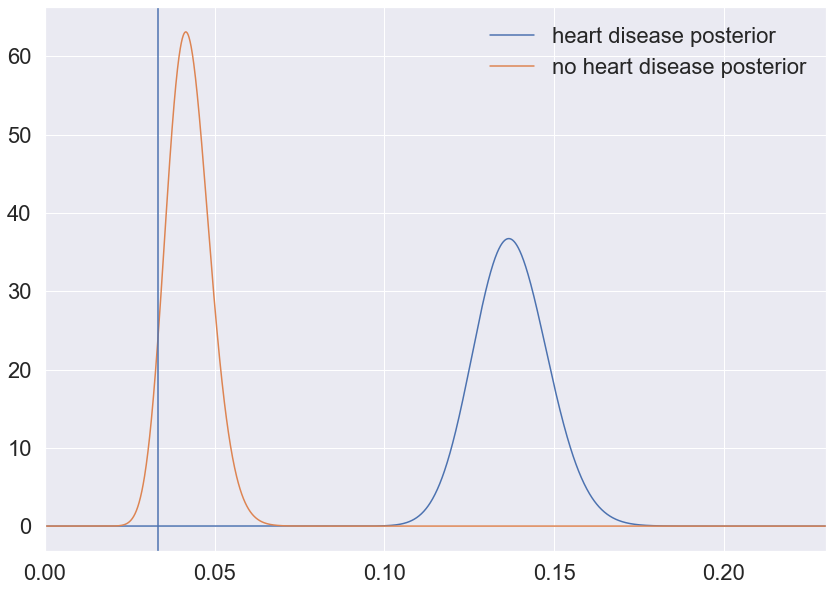

In [782]:
## Now we have a posterior distribution of both and we can say which is more likely.
## what portion of posterior pdf of heart disease is above 0.033
support = np.linspace(0,1,10000)
#prior = stats.beta(1/2,1/2)
heartdis_posteriorpdf = heartdis_posterior.pdf(support)
noheartdis_posteriorpdf = noheartdis_posterior.pdf(support)
fig,ax =plt.subplots(figsize = (14,10))
ax.plot(support,heartdis_posteriorpdf)
ax.plot(support,noheartdis_posteriorpdf)
ax.legend(['heart disease posterior','no heart disease posterior'])
ax.set_xlim(0,0.23)
## Question answered: how likely to get stroke if have heart disease
plt.axvline(0.03342)
## so 100% more likely to have stroke if you have heart disease?

In [783]:
1-heartdis_posterior.cdf(samp2.mean())
## 100% of the time posterior disribution if you have heart disease is greater
## than the posterior distribution if you dont have heart disease

1.0

``With bayes hypothesis testing way, we check how probable it is that the parameter p of one site is better than the another``

### Interpretation from above analysis: It is 100% likely that you have a higher probability of having a stroke if you have heart disease

#### b) The second way is to compare two distributions (another way)

#### Now we can sample from both distributions and compare what percent of the time sample from B is greater than sample from A

In [784]:
## Now we can sample from both distributions 
## What percent of the time you will have stroke if you have heart disease vs if you do not have heart disease?
heartdis_samples = heartdis_posterior.rvs(10)
noheartdis_samples = noheartdis_posterior.rvs(10)
a_gt_b = heartdis_samples>noheartdis_samples


In [785]:
a_gt_b.mean() ### 100 percent more likely to have stroke if you have heart disease?

1.0

## 8. Bayes Hypothesis testing: Male vs Female (comparing rate of stroke)

   - Question: Are males more likely to have stroke?
   - Null : There is no difference.
   - Alternate: Males are more likely to have stroke than females.

In [786]:
df_male = df[df['gender']=='Male']
df_male.count()

id                   2011
gender               2011
age                  2011
hypertension         2011
heart_disease        2011
ever_married         2011
work_type            2011
Residence_type       2011
avg_glucose_level    2011
bmi                  2011
smoking_status       2011
stroke               2011
hypertension_cat     2011
heart_disease_cat    2011
stroke_cat           2011
dtype: int64

In [787]:
df_female = df[df['gender']=='Female']
df_female.count()

id                   2897
gender               2897
age                  2897
hypertension         2897
heart_disease        2897
ever_married         2897
work_type            2897
Residence_type       2897
avg_glucose_level    2897
bmi                  2897
smoking_status       2897
stroke               2897
hypertension_cat     2897
heart_disease_cat    2897
stroke_cat           2897
dtype: int64

In [788]:
np.sum(df_male['stroke']),np.sum(df_female['stroke'])

(89, 120)

### a) Hypothesis testing(frequentist way)  : Male vs Female (rate of stroke)

In [789]:
stats.ttest_ind(df_male['strokeoke'],df_female['stroke'],equal_var = False)

KeyError: 'strokeoke'

### b) Bayesian approach: Fitting a beta distribution to get posterior beta

In [ ]:
post_male = stats.beta(1/2+89, 1/2 + 2011 - 89)
post_female = stats.beta(1/2+120, 1/2 + 2897 - 120)

In [ ]:
## Hypothesis testing with Bayes 

## Now we have a posterior distribution of both and we can say which is more likely.
## what portion of posterior pdf of heart disease is above 0.033
support = np.linspace(0,1,10000)
#prior = stats.beta(1/2,1/2)
post_malepdf = post_male.pdf(support)
post_femalepdf = post_female.pdf(support)
fig,ax =plt.subplots(figsize = (14,10))
ax.plot(support,post_malepdf)
ax.plot(support,post_femalepdf)
plt.legend(['male posterior','female posterior'])
ax.set_xlim(0,0.15)
ax.set_ylim(0,130)

## Question answered: how likely to get stroke if you are male
## what portion of posterior pdf of heart disease is above 0.033
1 - post_male.cdf(np.mean(df_female['stroke']))
#plt.axvline(0.041)
## so 74% more likely to have stroke if you are male?

### Interpretation :  Probability(Stroke rate of males is higher than females) is 74%.

#### Comparing two posterior distributions another way


In [ ]:
## Now we can sample from both distributions 
## What percent of the time you will have stroke if you are male vs if you are female?
male_samples = post_male.rvs(100000)
female_samples = post_female.rvs(100000)
a_gt_b = male_samples>female_samples
a_gt_b.mean()

### Interpretation :  Probability(Stroke rate of males is higher than females) is 69%.

### c) Credible Intervals

(Frequentist's approach):
   - Having fitted the model, we regularly want to get an interval for the true population mean. 
   - In frequentist statistics, these intervals are called "confidence intervals". 
   - Remember that in frequentist statistics the idea is that there is a true, unknown population parameter and the data is random. 
    
   - Then, the idea is to derive the confidence interval from a sample so that we can state that an interval constructed this way will contain the true parameter e.g., 95% of times.
   - Hence, with confidence intervals, we can only make probabilistic statements about the interval, not the parameter. We cannot say that the interval contains the true parameter with 95% probability.

#### In Bayes

   - In contrast, Bayesian credible intervals allow for these kind of probabilistic statements about the parameter.
   - They can be constructed very intuitively directly from the posterior by deriving e.g., the 95% highest density interval. 
   - Then, we can say that constructed interval contains the parameter with 95% probability.

#### Credibility interval of rate of stroke for Male and females 


In [ ]:
post_male.interval(0.95),post_female.interval(0.95)

## 9 . What are the top risk factors for Stroke

In [ ]:
def get_posterior(df_a,feature,categorical):
    ## creating samples of equal size from heart disease and no heart disease
    if feature == 'avg_glucose_level':
        samp  = df_a[df_a[feature]>120][categorical].sample(n = 5000,replace = True)
    elif df_a.dtypes[feature]==float:
        ## selecting sample greater than mean: for bmi,age
        samp  = df_a[df_a[feature]>df[feature].mean()][categorical].sample(n = 5000,replace = True)
    elif feature  == 'smoking_status':
        samp  = df_a[df_a[feature]=='smokes'][categorical].sample(n = 5000,replace = True)
    else:
        samp  = df_a[df_a[feature]==1][categorical].sample(n = 5000,replace = True)

    ## initializing beta prior
    a,b = 1/2,1/2
    samp_beta = stats.beta(a + np.sum(samp),b + len(samp) - np.sum(samp))
    return samp_beta
   

      


In [ ]:
def get_posterior_multiple(df_a,features,categorical):
    feat_posteriors = []
    for i,feat in enumerate(features):
        feat_posteriors.append((get_posterior(df_a,feat,categorical),feat))
    return feat_posteriors

In [ ]:
feat_dist_list = get_posterior_multiple(df,features = ['hypertension','heart_disease','bmi','smoking_status',
                                                      'avg_glucose_level','age'],categorical ='stroke')
feat_dist_list

In [ ]:
def plot_dist_post(dist_list,features):
    support = np.linspace(0,1,10000)
    feat_dist_pdf = []
    feature_list = []
    fig,ax =plt.subplots(figsize = (14,10))
    for feat_dist,feat in dist_list:
        feat_dist_pdf.append(feat_dist.pdf(support))
        feature_list.append(feat)
        ax.plot(support,feat_dist.pdf(support),linewidth=3.0)
        ax.set_xlim(0,0.4)
        ax.set_ylim(0,130)
    ax.legend(feature_list)

In [ ]:
plot_dist_post(feat_dist_list,features = ['hypertension','heart_disease','bmi','smoking_status',
                                                      'avg_glucose_level','age'])

#### Interpretation: Heart Disease and hypertension are the top risk factors for Stroke

References:

Bayesian inference intro
https://www.kaggle.com/philippsinger/introduction-to-bayesian-inference

Applications of AB testing
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5626665/

Awesome resource on beta binomial
https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af


Eexploratory data analysis
https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

Correlation
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

https://towardsdatascience.com/how-to-test-for-statistically-significant-relationships-between-categorical-variables-with-chi-66c3ebeda7cc

